In [1]:
import pandas as pd

# Load the dataset
file_path = './IMDB_Movies.csv'
df = pd.read_csv(file_path)

# Display the first few rows and check the columns in the dataset
df.head(), df.columns


(   color      director_name  num_critic_for_reviews  duration  \
 0  Color      James Cameron                   723.0     178.0   
 1  Color     Gore Verbinski                   302.0     169.0   
 2  Color         Sam Mendes                   602.0     148.0   
 3  Color  Christopher Nolan                   813.0     164.0   
 4    NaN        Doug Walker                     NaN       NaN   
 
    director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
 0                      0.0                   855.0  Joel David Moore   
 1                    563.0                  1000.0     Orlando Bloom   
 2                      0.0                   161.0      Rory Kinnear   
 3                  22000.0                 23000.0    Christian Bale   
 4                    131.0                     NaN        Rob Walker   
 
    actor_1_facebook_likes        gross                           genres  ...  \
 0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   


In [2]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Split the 'genres' column as movies can have multiple genres and need to handle them separately
# Create a new dataframe with a genre column containing individual genres
genre_df = df[['genres', 'imdb_score']].dropna()

# Split the genres by the '|' delimiter, then explode to convert each genre into a separate row
genre_df['genres'] = genre_df['genres'].str.split('|')
genre_df = genre_df.explode('genres').reset_index(drop=True)

# Group by genres and calculate descriptive statistics for IMDB scores
genre_stats = genre_df.groupby('genres')['imdb_score'].agg(['mean', 'median', 'std', 'var', 'count', 'min', 'max']).sort_values(by='count', ascending=False)

# Display the result
genre_stats


,mean,median,std,var,count,min,max
genres,,,,,,,
Drama,6.763763,6.90,0.957354,0.916527,2594,2.0,9.3
Comedy,6.195246,6.30,1.090714,1.189657,1872,1.7,9.5
Thriller,6.314245,6.40,1.054334,1.111620,1411,2.2,9.0
Action,6.239896,6.30,1.118835,1.251792,1153,1.7,9.1
Romance,6.450587,6.50,0.996035,0.992086,1107,2.1,8.6
Adventure,6.441170,6.60,1.131196,1.279605,923,1.9,8.9
Crime,6.564792,6.60,1.026456,1.053613,889,2.4,9.3
Sci-Fi,6.281818,6.40,1.210816,1.466075,616,1.9,8.8
Fantasy,6.307049,6.40,1.160686,1.347192,610,1.7,8.9


In [4]:
# Split the 'genres' column into individual genres
df['genres'] = df['genres'].dropna().str.split('|')
genre_df = df.explode('genres')

# Group by genres and calculate descriptive statistics
genre_stats = genre_df.groupby('genres')['imdb_score'].agg(['mean', 'median', 'std', 'var', 'count', 'min', 'max']).reset_index()

# Display genre statistics
print(genre_stats)



         genres      mean  median       std       var  count  min  max
0        Action  6.239896    6.30  1.118835  1.251792   1153  1.7  9.1
1     Adventure  6.441170    6.60  1.131196  1.279605    923  1.9  8.9
2     Animation  6.576033    6.70  1.139595  1.298676    242  1.7  8.6
3     Biography  7.150171    7.20  0.722516  0.522029    293  4.5  8.9
4        Comedy  6.195246    6.30  1.090714  1.189657   1872  1.7  9.5
5         Crime  6.564792    6.60  1.026456  1.053613    889  2.4  9.3
6   Documentary  7.180165    7.40  1.056537  1.116270    121  1.6  8.7
7         Drama  6.763763    6.90  0.957354  0.916527   2594  2.0  9.3
8        Family  6.245055    6.40  1.201598  1.443838    546  1.7  8.7
9       Fantasy  6.307049    6.40  1.160686  1.347192    610  1.7  8.9
10    Film-Noir  7.633333    7.65  0.432049  0.186667      6  7.1  8.2
11    Game-Show  2.900000    2.90       NaN       NaN      1  2.9  2.9
12      History  7.083575    7.20  0.887902  0.788370    207  2.0  8.9
13    

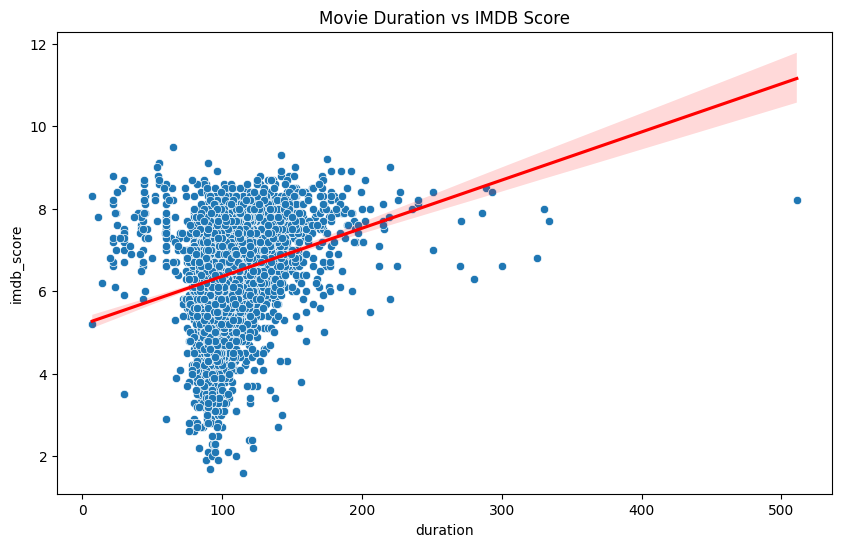

count    5028.000000
mean      107.201074
std        25.197441
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for movie duration
duration_stats = df['duration'].describe()

# Scatter plot of Duration vs IMDB Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='imdb_score', data=df)
plt.title('Movie Duration vs IMDB Score')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDB Score')

# Add trendline
sns.regplot(x='duration', y='imdb_score', data=df, scatter=False, color='red')
plt.show()

# Print duration statistics
print(duration_stats)


In [6]:
# Count the number of movies by language and calculate descriptive statistics for IMDB scores
language_stats = df.groupby('language')['imdb_score'].agg(['mean', 'median', 'std', 'count']).reset_index()

# Display language statistics
print(language_stats)


      language      mean  median       std  count
0   Aboriginal  6.950000    6.95  0.777817      2
1       Arabic  7.380000    7.40  0.884308      5
2      Aramaic  7.100000    7.10       NaN      1
3      Bosnian  4.300000    4.30       NaN      1
4    Cantonese  6.954545    7.20  0.704789     11
5      Chinese  5.666667    5.70  0.550757      3
6        Czech  7.400000    7.40       NaN      1
7       Danish  7.500000    8.10  1.077033      5
8         Dari  7.500000    7.50  0.141421      2
9        Dutch  7.425000    7.45  0.434933      4
10    Dzongkha  7.500000    7.50       NaN      1
11     English  6.398427    6.50  1.122068   4704
12    Filipino  6.700000    6.70       NaN      1
13      French  7.038356    7.20  0.726986     73
14      German  7.342105    7.60  0.954123     19
15       Greek  7.300000    7.30       NaN      1
16      Hebrew  7.580000    7.60  0.334664      5
17       Hindi  6.632143    6.95  1.398956     28
18   Hungarian  7.100000    7.10       NaN      1


In [7]:
# Calculate the average IMDb score for each director
director_stats = df.groupby('director_name')['imdb_score'].mean().reset_index().sort_values(by='imdb_score', ascending=False)

# Select top 10 directors based on average IMDb score
top_directors = director_stats.head(10)

# Calculate descriptive statistics for the overall IMDb scores in the dataset
overall_imdb_stats = df['imdb_score'].describe()

# Display the overall IMDb statistics
print("Overall IMDb Score Statistics:")
print(overall_imdb_stats)

# Display the top 10 directors and their average IMDb scores
print("\nTop 10 Directors and Their Average IMDb Scores:")
print(top_directors)

# Compare top directors' scores with the overall mean IMDb score
top_directors['compared_to_mean'] = top_directors['imdb_score'] - overall_imdb_stats['mean']

# Show comparison of top directors to overall mean IMDb score
print("\nComparison of Top Directors to Overall IMDb Score Mean:")
print(top_directors[['director_name', 'imdb_score', 'compared_to_mean']])


Overall IMDb Score Statistics:
count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

Top 10 Directors and Their Average IMDb Scores:
         director_name  imdb_score
1084    John Blanchard         9.5
1620  Mitchell Altieri         8.7
2011  Sadyk Sher-Niyaz         8.7
299          Cary Bell         8.7
1606      Mike Mayhall         8.6
315    Charles Chaplin         8.6
1417      Majid Majidi         8.5
1979        Ron Fricke         8.5
428    Damien Chazelle         8.5
1835        Raja Menon         8.5

Comparison of Top Directors to Overall IMDb Score Mean:
         director_name  imdb_score  compared_to_mean
1084    John Blanchard         9.5          3.057862
1620  Mitchell Altieri         8.7          2.257862
2011  Sadyk Sher-Niyaz         8.7          2.257862
299          Cary Bell         8.7          2.257862
1606      Mi

C:\Users\Sumit\AppData\Local\Temp\ipykernel_12344\1691980812.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_directors['compared_to_mean'] = top_directors['imdb_score'] - overall_imdb_stats['mean']


In [8]:
# Average IMDB score for each director
director_stats = df.groupby('director_name')['imdb_score'].mean().reset_index().sort_values(by='imdb_score', ascending=False)

# Top directors based on IMDB score
top_directors = director_stats.head(10)

# Percentile calculation
df['director_percentile'] = df['imdb_score'].rank(pct=True)

# Display top directors
print(top_directors)



         director_name  imdb_score
1084    John Blanchard         9.5
1620  Mitchell Altieri         8.7
2011  Sadyk Sher-Niyaz         8.7
299          Cary Bell         8.7
1606      Mike Mayhall         8.6
315    Charles Chaplin         8.6
1417      Majid Majidi         8.5
1979        Ron Fricke         8.5
428    Damien Chazelle         8.5
1835        Raja Menon         8.5


In [2]:
import pandas as pd

# Load the dataset (replace 'IMDB_Movies.csv' with your file path)
df = pd.read_csv('IMDB_Movies.csv')

# ------ Task E: Budget Analysis ------

# 1. Calculate the profit margin for each movie
# Profit margin is calculated as the difference between gross earnings and budget
df['profit_margin'] = df['gross'] - df['budget']

# 2. Calculate the correlation between movie budgets and gross earnings
# Use the 'CORREL' function in Excel-like way but in Python, use pandas corr() method
correlation = df[['budget', 'gross']].corr().iloc[0, 1]

# 3. Identify the movie with the highest profit margin
max_profit_movie = df.loc[df['profit_margin'].idxmax()]

# ------ Display results ------

# Print the correlation between budget and gross earnings
print(f"Correlation between budget and gross earnings: {correlation}")

# Print the movie with the highest profit margin
print("Movie with the highest profit margin:")
print(f"Title: {max_profit_movie['movie_title']}")
print(f"Profit Margin: {max_profit_movie['profit_margin']}")


Correlation between budget and gross earnings: 0.10217945351303376
Movie with the highest profit margin:
Title: Avatar 
Profit Margin: 523505847.0
